## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

## Importing Dataset and Data Pre-Processing 

In [2]:
dataset = pd.read_csv('car data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.shape

(301, 9)

In [5]:
# Checking for missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Printing Catagorical Values
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
dataset['Number_of_Years'] = 2021 - dataset['Year']

In [10]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [11]:
dataset.drop(columns = ['Year', 'Car_Name'], inplace = True)

In [12]:
dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [13]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [14]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [15]:
X = dataset.drop(columns = ["Selling_Price"])
y = dataset["Selling_Price"]

In [16]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [17]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape, X_test.shape

((240, 8), (61, 8))

In [20]:
X_train.corr()

,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Present_Price,1.000000,0.177232,0.030302,0.053884,0.493380,-0.489613,-0.500220,-0.358573
Kms_Driven,0.177232,1.000000,0.101413,0.527172,0.159176,-0.160961,-0.068918,-0.141791
Owner,0.030302,0.101413,1.000000,0.184713,-0.043619,0.044969,0.118241,-0.071426
Number_of_Years,0.053884,0.527172,0.184713,1.000000,-0.052847,0.042773,0.037310,0.061072
Fuel_Type_Diesel,0.493380,0.159176,-0.043619,-0.052847,1.000000,-0.987538,-0.358432,-0.107800
Fuel_Type_Petrol,-0.489613,-0.160961,0.044969,0.042773,-0.987538,1.000000,0.363381,0.102811
Seller_Type_Individual,-0.500220,-0.068918,0.118241,0.037310,-0.358432,0.363381,1.000000,0.059140
Transmission_Manual,-0.358573,-0.141791,-0.071426,0.061072,-0.107800,0.102811,0.059140,1.000000


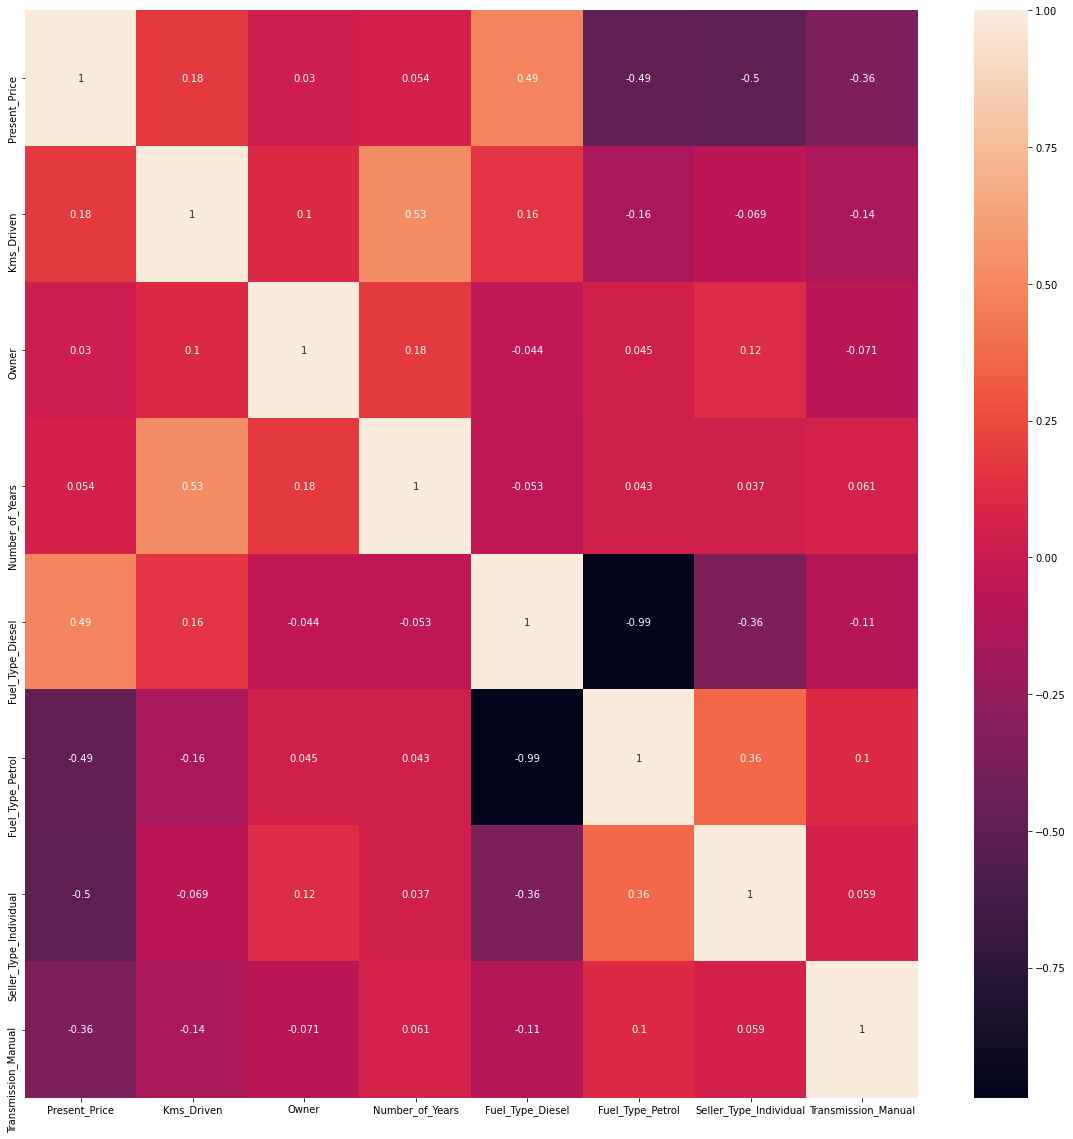

In [21]:
import seaborn as sbn
correlation_matrix = X_train.corr()
plt.figure(figsize= (20,20))
sbn.heatmap(correlation_matrix, annot=True)
plt.show()

In [22]:
def correlation(dataset, threshold):
    corr_cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # abs handels the negatively correlated features
                colname = corr_matrix.columns[i] # getting the column name
                corr_cols.add(colname)
    return corr_cols

In [23]:
corelated_cols = correlation(X_train, 0.85)

In [24]:
len(corelated_cols)

1

In [25]:
corelated_cols

{'Fuel_Type_Petrol'}

In [26]:
X_train = X_train.drop(columns=corelated_cols)
X_test = X_test.drop(columns=corelated_cols)

In [27]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
263,7.70,16002,0,5,0,0,1
238,9.40,60241,0,8,0,0,1
128,0.87,3000,0,4,0,1,1
230,9.40,45000,0,8,1,0,1
122,1.17,6000,0,5,0,1,1


## Training the Random Forest Regressor model on the Training set

In [29]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {
    'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(5, 30, num = 6)],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10]
}
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = parameters, scoring='neg_mean_squared_error',
                          n_jobs = -1, cv = 4, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 2880 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200]},
             scoring='neg_mean_squared_error', verbose=2)

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20)

In [33]:
grid_search.best_score_

-3.2560851237916646

In [34]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Predicting The Test Set Result

In [35]:
y_pred = grid_search.predict(X_test)

In [36]:
y_pred = pd.DataFrame(y_pred, columns=["Y_Predict"])

In [37]:
result = pd.concat([y_pred, y_test], axis=1, join="inner")

In [38]:
result

,Y_Predict,Selling_Price
0,0.1267,3.35
1,0.4316,4.75
5,0.5623,9.25
13,0.4453,6.10
18,0.3331,3.25
25,6.1255,3.00
26,3.4535,4.15
32,16.7654,4.95
33,0.6560,6.00
39,6.0079,2.25


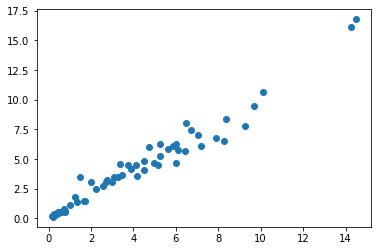

In [39]:
plt.scatter(y_test,y_pred)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9499488698766374